# PACKAGES AND LIBRARIES

In [103]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D, Conv2DTranspose,ReLU
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
from keras import backend
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH,LABEL,TRANSFORMATION PROCESS

#### MAIN PATH

In [2]:
Class_Dict_Path = "../input/deepglobe-road-extraction-dataset/class_dict.csv"
Metadata_Path = "../input/deepglobe-road-extraction-dataset/metadata.csv"
Main_Direction = "../input/deepglobe-road-extraction-dataset"

In [3]:
Reading_Class_Dict = pd.read_csv(Class_Dict_Path)
Reading_Metadata = pd.read_csv(Metadata_Path)

In [4]:
print(Reading_Class_Dict.head())

         name    r    g    b
0        road  255  255  255
1  background    0    0    0


In [5]:
print(Reading_Metadata.head(-1))

      image_id  split        sat_image_path              mask_path
0       100034  train  train/100034_sat.jpg  train/100034_mask.png
1       100081  train  train/100081_sat.jpg  train/100081_mask.png
2       100129  train  train/100129_sat.jpg  train/100129_mask.png
3       100703  train  train/100703_sat.jpg  train/100703_mask.png
4       100712  train  train/100712_sat.jpg  train/100712_mask.png
...        ...    ...                   ...                    ...
8564    997992   test   test/997992_sat.jpg                    NaN
8565    998829   test   test/998829_sat.jpg                    NaN
8566    998928   test   test/998928_sat.jpg                    NaN
8567    999518   test   test/999518_sat.jpg                    NaN
8568    999651   test   test/999651_sat.jpg                    NaN

[8569 rows x 4 columns]


#### SPLITTING PATH AND PROCESS

In [6]:
Metadata_Train = Reading_Metadata[Reading_Metadata["split"] == "train"]
Metadata_Test = Reading_Metadata[Reading_Metadata["split"] == "test"]

In [7]:
print(Metadata_Train.head(-1))

      image_id  split        sat_image_path              mask_path
0       100034  train  train/100034_sat.jpg  train/100034_mask.png
1       100081  train  train/100081_sat.jpg  train/100081_mask.png
2       100129  train  train/100129_sat.jpg  train/100129_mask.png
3       100703  train  train/100703_sat.jpg  train/100703_mask.png
4       100712  train  train/100712_sat.jpg  train/100712_mask.png
...        ...    ...                   ...                    ...
6220    999248  train  train/999248_sat.jpg  train/999248_mask.png
6221    999431  train  train/999431_sat.jpg  train/999431_mask.png
6222    999531  train  train/999531_sat.jpg  train/999531_mask.png
6223    999667  train  train/999667_sat.jpg  train/999667_mask.png
6224    999764  train  train/999764_sat.jpg  train/999764_mask.png

[6225 rows x 4 columns]


In [ ]:
Metadata_Train.drop("split",inplace=True,axis=1)

In [9]:
Metadata_Test.drop("split",inplace=True,axis=1)

In [10]:
Metadata_Test.drop("mask_path",inplace=True,axis=1)

In [11]:
print(Metadata_Test.head(-1))

      image_id       sat_image_path
7469    100393  test/100393_sat.jpg
7470    100995  test/100995_sat.jpg
7471    101982  test/101982_sat.jpg
7472     10206   test/10206_sat.jpg
7473    102240  test/102240_sat.jpg
...        ...                  ...
8564    997992  test/997992_sat.jpg
8565    998829  test/998829_sat.jpg
8566    998928  test/998928_sat.jpg
8567    999518  test/999518_sat.jpg
8568    999651  test/999651_sat.jpg

[1100 rows x 2 columns]


In [12]:
print(Metadata_Train.head(-1))

      image_id        sat_image_path              mask_path
0       100034  train/100034_sat.jpg  train/100034_mask.png
1       100081  train/100081_sat.jpg  train/100081_mask.png
2       100129  train/100129_sat.jpg  train/100129_mask.png
3       100703  train/100703_sat.jpg  train/100703_mask.png
4       100712  train/100712_sat.jpg  train/100712_mask.png
...        ...                   ...                    ...
6220    999248  train/999248_sat.jpg  train/999248_mask.png
6221    999431  train/999431_sat.jpg  train/999431_mask.png
6222    999531  train/999531_sat.jpg  train/999531_mask.png
6223    999667  train/999667_sat.jpg  train/999667_mask.png
6224    999764  train/999764_sat.jpg  train/999764_mask.png

[6225 rows x 3 columns]


In [13]:
Metadata_Train = Metadata_Train.reset_index()
Metadata_Test = Metadata_Test.reset_index()

In [14]:
print(Metadata_Test.head(-1))

      index  image_id       sat_image_path
0      7469    100393  test/100393_sat.jpg
1      7470    100995  test/100995_sat.jpg
2      7471    101982  test/101982_sat.jpg
3      7472     10206   test/10206_sat.jpg
4      7473    102240  test/102240_sat.jpg
...     ...       ...                  ...
1095   8564    997992  test/997992_sat.jpg
1096   8565    998829  test/998829_sat.jpg
1097   8566    998928  test/998928_sat.jpg
1098   8567    999518  test/999518_sat.jpg
1099   8568    999651  test/999651_sat.jpg

[1100 rows x 3 columns]


In [15]:
print(Metadata_Train.head(-1))

      index  image_id        sat_image_path              mask_path
0         0    100034  train/100034_sat.jpg  train/100034_mask.png
1         1    100081  train/100081_sat.jpg  train/100081_mask.png
2         2    100129  train/100129_sat.jpg  train/100129_mask.png
3         3    100703  train/100703_sat.jpg  train/100703_mask.png
4         4    100712  train/100712_sat.jpg  train/100712_mask.png
...     ...       ...                   ...                    ...
6220   6220    999248  train/999248_sat.jpg  train/999248_mask.png
6221   6221    999431  train/999431_sat.jpg  train/999431_mask.png
6222   6222    999531  train/999531_sat.jpg  train/999531_mask.png
6223   6223    999667  train/999667_sat.jpg  train/999667_mask.png
6224   6224    999764  train/999764_sat.jpg  train/999764_mask.png

[6225 rows x 4 columns]


#### DIRECTION PROCESS

In [16]:
Metadata_Train["sat_image_path"] = Metadata_Train["sat_image_path"].apply(lambda sat_path: os.path.join(Main_Direction,sat_path))

In [17]:
Metadata_Train["mask_path"] = Metadata_Train["mask_path"].apply(lambda mask_path: os.path.join(Main_Direction,mask_path))

In [18]:
print(Metadata_Train.head(-1))

      index  image_id                                     sat_image_path  \
0         0    100034  ../input/deepglobe-road-extraction-dataset/tra...   
1         1    100081  ../input/deepglobe-road-extraction-dataset/tra...   
2         2    100129  ../input/deepglobe-road-extraction-dataset/tra...   
3         3    100703  ../input/deepglobe-road-extraction-dataset/tra...   
4         4    100712  ../input/deepglobe-road-extraction-dataset/tra...   
...     ...       ...                                                ...   
6220   6220    999248  ../input/deepglobe-road-extraction-dataset/tra...   
6221   6221    999431  ../input/deepglobe-road-extraction-dataset/tra...   
6222   6222    999531  ../input/deepglobe-road-extraction-dataset/tra...   
6223   6223    999667  ../input/deepglobe-road-extraction-dataset/tra...   
6224   6224    999764  ../input/deepglobe-road-extraction-dataset/tra...   

                                              mask_path  
0     ../input/deepglobe-road

In [19]:
Metadata_Test["sat_image_path"] = Metadata_Test["sat_image_path"].apply(lambda sat_path: os.path.join(Main_Direction,sat_path))

In [20]:
print(Metadata_Test.head(-1))

      index  image_id                                     sat_image_path
0      7469    100393  ../input/deepglobe-road-extraction-dataset/tes...
1      7470    100995  ../input/deepglobe-road-extraction-dataset/tes...
2      7471    101982  ../input/deepglobe-road-extraction-dataset/tes...
3      7472     10206  ../input/deepglobe-road-extraction-dataset/tes...
4      7473    102240  ../input/deepglobe-road-extraction-dataset/tes...
...     ...       ...                                                ...
1095   8564    997992  ../input/deepglobe-road-extraction-dataset/tes...
1096   8565    998829  ../input/deepglobe-road-extraction-dataset/tes...
1097   8566    998928  ../input/deepglobe-road-extraction-dataset/tes...
1098   8567    999518  ../input/deepglobe-road-extraction-dataset/tes...
1099   8568    999651  ../input/deepglobe-road-extraction-dataset/tes...

[1100 rows x 3 columns]


#### SHUFFLING

In [21]:
Metadata_Train = Metadata_Train.sample(frac=1).reset_index(drop=True)

In [22]:
print(Metadata_Train.head(-1))

      index  image_id                                     sat_image_path  \
0      4307     71759  ../input/deepglobe-road-extraction-dataset/tra...   
1       253    138975  ../input/deepglobe-road-extraction-dataset/tra...   
2      5201    847602  ../input/deepglobe-road-extraction-dataset/tra...   
3      2111    401546  ../input/deepglobe-road-extraction-dataset/tra...   
4       240    137632  ../input/deepglobe-road-extraction-dataset/tra...   
...     ...       ...                                                ...   
6220   1692    342627  ../input/deepglobe-road-extraction-dataset/tra...   
6221   2533    461178  ../input/deepglobe-road-extraction-dataset/tra...   
6222   5372     86980  ../input/deepglobe-road-extraction-dataset/tra...   
6223   3860    650720  ../input/deepglobe-road-extraction-dataset/tra...   
6224   3776      6383  ../input/deepglobe-road-extraction-dataset/tra...   

                                              mask_path  
0     ../input/deepglobe-road

#### SPLITTING TRAIN AND VALIDATION

In [23]:
Validation_Data = Metadata_Train.sample(frac=0.1,random_state=123)

In [24]:
print(len(Validation_Data))

623


In [25]:
print(Validation_Data.head(-1))

      index  image_id                                     sat_image_path  \
540    1951    377745  ../input/deepglobe-road-extraction-dataset/tra...   
970    4233    707759  ../input/deepglobe-road-extraction-dataset/tra...   
1581   5833    940208  ../input/deepglobe-road-extraction-dataset/tra...   
1777   4366    725249  ../input/deepglobe-road-extraction-dataset/tra...   
608    2762    491869  ../input/deepglobe-road-extraction-dataset/tra...   
...     ...       ...                                                ...   
5145   4928     81104  ../input/deepglobe-road-extraction-dataset/tra...   
2183   2600     47144  ../input/deepglobe-road-extraction-dataset/tra...   
4448   1417    301568  ../input/deepglobe-road-extraction-dataset/tra...   
5448   5109    834264  ../input/deepglobe-road-extraction-dataset/tra...   
244    2869    508583  ../input/deepglobe-road-extraction-dataset/tra...   

                                              mask_path  
540   ../input/deepglobe-road

In [26]:
Train_Data = Metadata_Train.drop(Validation_Data.index)

In [27]:
print(len(Train_Data))

5603


In [28]:
print(Train_Data.head(-1))

      index  image_id                                     sat_image_path  \
0      4307     71759  ../input/deepglobe-road-extraction-dataset/tra...   
1       253    138975  ../input/deepglobe-road-extraction-dataset/tra...   
2      5201    847602  ../input/deepglobe-road-extraction-dataset/tra...   
3      2111    401546  ../input/deepglobe-road-extraction-dataset/tra...   
5      5425    878394  ../input/deepglobe-road-extraction-dataset/tra...   
...     ...       ...                                                ...   
6219   3710     62946  ../input/deepglobe-road-extraction-dataset/tra...   
6220   1692    342627  ../input/deepglobe-road-extraction-dataset/tra...   
6221   2533    461178  ../input/deepglobe-road-extraction-dataset/tra...   
6222   5372     86980  ../input/deepglobe-road-extraction-dataset/tra...   
6223   3860    650720  ../input/deepglobe-road-extraction-dataset/tra...   

                                              mask_path  
0     ../input/deepglobe-road

#### CLASS PROCESS

In [29]:
Class_Names = Reading_Class_Dict["name"].tolist()

In [30]:
print(Class_Names)

['road', 'background']


In [31]:
RGB_Values = Reading_Class_Dict[["r","g","b"]].values.tolist()

In [32]:
print(RGB_Values)

[[255, 255, 255], [0, 0, 0]]


In [33]:
Class_Type = ['background', 'road']

In [34]:
Class_Indices = [Class_Names.index(cls.lower()) for cls in Class_Type]

In [35]:
print(Class_Indices)

[1, 0]


In [36]:
Class_RGB_Values = np.array(RGB_Values)[Class_Indices]

In [37]:
print(Class_RGB_Values)

[[  0   0   0]
 [255 255 255]]


# IMAGE PROCESS

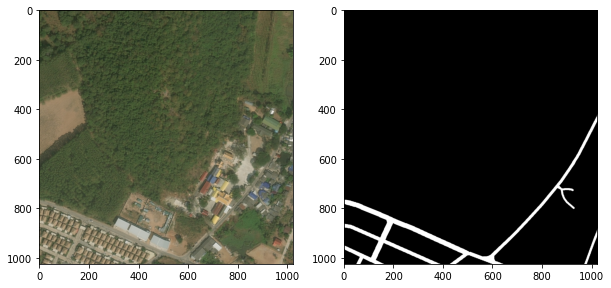

In [38]:
Example_Sat_Image = cv2.cvtColor(cv2.imread(Train_Data["sat_image_path"][3]),cv2.COLOR_BGR2RGB)
Example_Mask_Image = cv2.cvtColor(cv2.imread(Train_Data["mask_path"][3]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Example_Sat_Image)
axis[1].imshow(Example_Mask_Image)

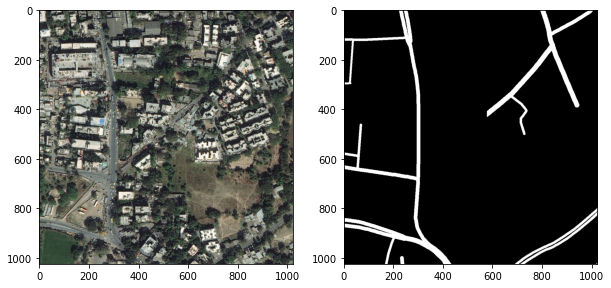

In [39]:
Example_Sat_Image = cv2.cvtColor(cv2.imread(Train_Data["sat_image_path"][30]),cv2.COLOR_BGR2RGB)
Example_Mask_Image = cv2.cvtColor(cv2.imread(Train_Data["mask_path"][30]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Example_Sat_Image)
axis[1].imshow(Example_Mask_Image)

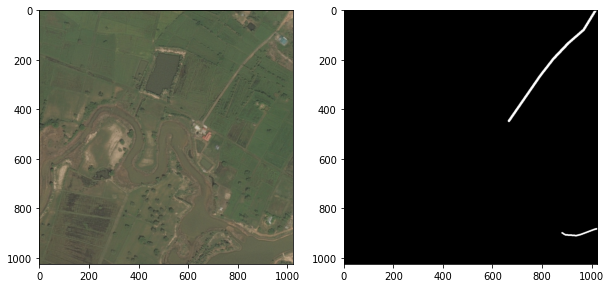

In [40]:
Example_Sat_Image = cv2.cvtColor(cv2.imread(Train_Data["sat_image_path"][587]),cv2.COLOR_BGR2RGB)
Example_Mask_Image = cv2.cvtColor(cv2.imread(Train_Data["mask_path"][587]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Example_Sat_Image)
axis[1].imshow(Example_Mask_Image)

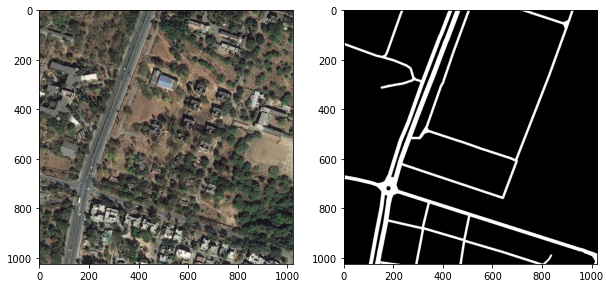

In [41]:
Example_Sat_Image = cv2.cvtColor(cv2.imread(Train_Data["sat_image_path"][7]),cv2.COLOR_BGR2RGB)
Example_Mask_Image = cv2.cvtColor(cv2.imread(Train_Data["mask_path"][7]),cv2.COLOR_BGR2RGB)

figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Example_Sat_Image)
axis[1].imshow(Example_Mask_Image)

In [42]:
def one_hot_encode(label, label_values):
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map

In [43]:
Example_Sat_Image = cv2.cvtColor(cv2.imread(Train_Data["sat_image_path"][7]),cv2.COLOR_BGR2RGB)
Example_Mask_Image = cv2.cvtColor(cv2.imread(Train_Data["mask_path"][7]),cv2.COLOR_BGR2RGB)

Mask_One_Hot_Example = []

for color in RGB_Values:
    Equality_Value = np.equal(Example_Mask_Image,color)
    Class_Value = np.all(Equality_Value,axis = -1)
    Mask_One_Hot_Example.append(Class_Value)
    
Mask_One_Hot_Example = np.stack(Mask_One_Hot_Example,axis = -1).astype("float")

In [44]:
print(Mask_One_Hot_Example[:,:,0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
print(Example_Mask_Image[:,:,0])

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [46]:
print(Example_Mask_Image[:,:,0].shape)

(1024, 1024)


In [47]:
print(Example_Mask_Image.shape)
print(Mask_One_Hot_Example.shape)

(1024, 1024, 3)
(1024, 1024, 2)


In [48]:
Array_Mask_Img = np.array(Example_Mask_Image)
Array_One_Hot_Img = np.array(Mask_One_Hot_Example)

In [49]:
print(Array_Mask_Img.shape)
print(Array_One_Hot_Img.shape)

(1024, 1024, 3)
(1024, 1024, 2)


In [50]:
print(np.argmax(Mask_One_Hot_Example, axis = -1))

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [51]:
print(np.argmax(Mask_One_Hot_Example, axis = -1).shape)

(1024, 1024)


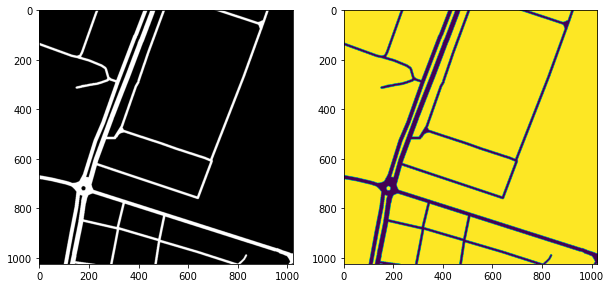

In [52]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Example_Mask_Image)
axis[1].imshow(np.argmax(Mask_One_Hot_Example, axis = -1))

In [53]:
colour_codes_example = np.array(Class_RGB_Values)
truth_mask = colour_codes_example[np.argmax(Mask_One_Hot_Example, axis = -1).astype(int)]

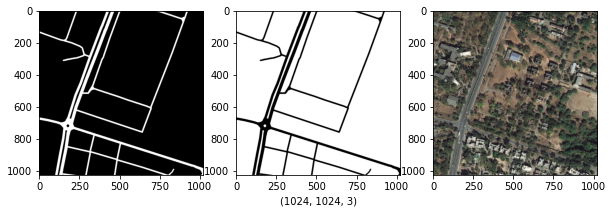

In [54]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

axis[0].imshow(Example_Mask_Image)
axis[1].imshow(truth_mask)
axis[1].set_xlabel(truth_mask.shape)
axis[2].imshow(Example_Sat_Image)

# DATA PROCESS

In [55]:
Splitting_Data = Metadata_Train[0:3000]

In [56]:
print(Splitting_Data.head(-1))

      index  image_id                                     sat_image_path  \
0      4307     71759  ../input/deepglobe-road-extraction-dataset/tra...   
1       253    138975  ../input/deepglobe-road-extraction-dataset/tra...   
2      5201    847602  ../input/deepglobe-road-extraction-dataset/tra...   
3      2111    401546  ../input/deepglobe-road-extraction-dataset/tra...   
4       240    137632  ../input/deepglobe-road-extraction-dataset/tra...   
...     ...       ...                                                ...   
2994    905    232253  ../input/deepglobe-road-extraction-dataset/tra...   
2995   5921    951435  ../input/deepglobe-road-extraction-dataset/tra...   
2996    152    123079  ../input/deepglobe-road-extraction-dataset/tra...   
2997   4294    716204  ../input/deepglobe-road-extraction-dataset/tra...   
2998    214    132983  ../input/deepglobe-road-extraction-dataset/tra...   

                                              mask_path  
0     ../input/deepglobe-road

In [57]:
Sat_Image = []
Mask_Image = []

for sat_img,mask_img in zip(Splitting_Data.sat_image_path,Splitting_Data.mask_path):
    Reading_Sat = cv2.cvtColor(cv2.imread(sat_img),cv2.COLOR_BGR2RGB)
    Reading_Sat = cv2.resize(Reading_Sat,(180,180))
    Reading_Sat = Reading_Sat/255.
    
    Reading_Mask = cv2.cvtColor(cv2.imread(mask_img),cv2.COLOR_BGR2RGB)
    Reading_Mask = cv2.resize(Reading_Mask,(180,180))
    Reading_Mask = Reading_Mask/255.
    
    Sat_Image.append(Reading_Sat)
    Mask_Image.append(Reading_Mask[:,:,0])

In [58]:
print(Sat_Image[0].shape)
print(Mask_Image[0].shape)

(180, 180, 3)
(180, 180)


In [59]:
print(Sat_Image[0].dtype)
print(Mask_Image[0].dtype)

float64
float64


In [60]:
Sat_Array = np.array(Sat_Image)
Mask_Array = np.array(Mask_Image)

In [61]:
print(Sat_Array.shape)
print(Mask_Array.shape)

(3000, 180, 180, 3)
(3000, 180, 180)


# MODEL

In [62]:
compile_loss = "binary_crossentropy"
compile_optimizer = "adam"
compile_metrics = ["accuracy"]
input_dim = (Sat_Array.shape[1],Sat_Array.shape[2],Sat_Array.shape[3])
output_class = 1

In [63]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [64]:
Encoder_G = Sequential()
Encoder_G.add(Conv2D(32, (5,5),kernel_initializer = 'he_normal'))
Encoder_G.add(ReLU())
Encoder_G.add(Conv2D(64, (5,5),kernel_initializer = 'he_normal'))
Encoder_G.add(ReLU())
Encoder_G.add(Conv2D(128, (5,5),kernel_initializer = 'he_normal'))
Encoder_G.add(ReLU())

In [65]:
Decoder_G = Sequential()
Decoder_G.add(Conv2DTranspose(64,(5,5)))
Decoder_G.add(ReLU())
Decoder_G.add(Conv2DTranspose(32,(5,5)))
Decoder_G.add(ReLU())
Decoder_G.add(Conv2DTranspose(1,(5,5)))
Decoder_G.add(ReLU())

In [66]:
Auto_Encoder = Sequential([Encoder_G,Decoder_G])

In [67]:
Auto_Encoder.compile(loss=compile_loss,optimizer=compile_optimizer,metrics=compile_metrics)

In [68]:
Auto_Encoder_Model = Auto_Encoder.fit(Sat_Array,Mask_Array,epochs=5,callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/5
94/94 [==============================] - 141s 1s/step - loss: 0.6342 - accuracy: 0.9379
Epoch 2/5
94/94 [==============================] - 125s 1s/step - loss: 0.6077 - accuracy: 0.9540
Epoch 3/5
94/94 [==============================] - 125s 1s/step - loss: 0.6159 - accuracy: 0.9516
Epoch 4/5
94/94 [==============================] - 125s 1s/step - loss: 0.3366 - accuracy: 0.9477
Epoch 5/5
94/94 [==============================] - 125s 1s/step - loss: 0.1567 - accuracy: 0.9522


#### PREDICTION

In [69]:
Prediction_IMG = Auto_Encoder.predict(Sat_Array[:5])

In [120]:
print(Prediction_IMG[0].shape)

(180, 180, 1)


NORMAL


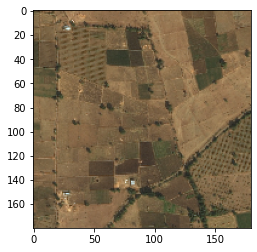

AUTO-ENCODER OUTPUT


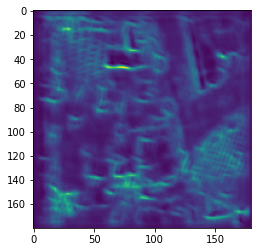

In [74]:
prediction_img_number = 1
print("NORMAL")
plt.imshow(Sat_Array[prediction_img_number])
plt.show()
print("AUTO-ENCODER OUTPUT")
plt.imshow(Prediction_IMG[prediction_img_number])

NORMAL


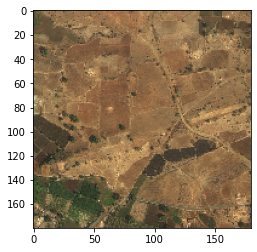

AUTO-ENCODER OUTPUT


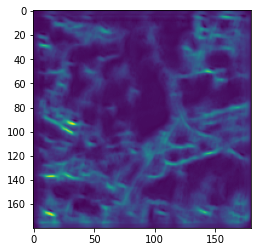

In [75]:
prediction_img_number = 2
print("NORMAL")
plt.imshow(Sat_Array[prediction_img_number])
plt.show()
print("AUTO-ENCODER OUTPUT")
plt.imshow(Prediction_IMG[prediction_img_number])

NORMAL


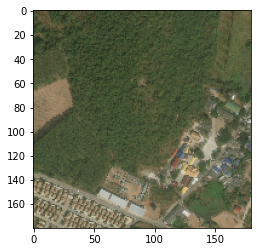

AUTO-ENCODER OUTPUT


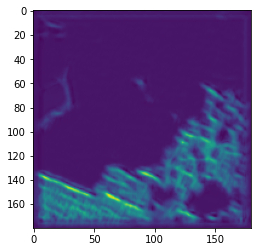

In [76]:
prediction_img_number = 3
print("NORMAL")
plt.imshow(Sat_Array[prediction_img_number])
plt.show()
print("AUTO-ENCODER OUTPUT")
plt.imshow(Prediction_IMG[prediction_img_number])

#### SPECIAL PREDICTION / THE MODEL HAS NEVER SEEN BEFORE

In [128]:
backend.set_image_data_format('channels_last')

Non_S_IMG = cv2.cvtColor(cv2.imread("../input/satellitegooglemapsmasks/content/drive/MyDrive/Google maps/train/images/1013.jpg"),
                        cv2.COLOR_BGR2RGB)

Resize_IMG = cv2.resize(Non_S_IMG,(180,180))
Resize_IMG = Resize_IMG/255.

In [114]:
print(Resize_IMG.shape)

(180, 180, 3)


In [129]:
Resize_IMG_Prediction = Resize_IMG.reshape(-1,Resize_IMG.shape[0],Resize_IMG.shape[1],Resize_IMG.shape[2])

In [116]:
print(Resize_IMG_Prediction.shape)

(1, 180, 180, 3)


In [130]:
Prediction_IMG_Another = Auto_Encoder.predict(Resize_IMG_Prediction)

In [121]:
print(Prediction_IMG_Another.shape)

(1, 180, 180, 1)


In [131]:
Prediction_IMG_Another = Prediction_IMG_Another.reshape(Prediction_IMG_Another.shape[1],
                                                        Prediction_IMG_Another.shape[2],
                                                        Prediction_IMG_Another.shape[3])

In [124]:
print(Prediction_IMG_Another.shape)

(180, 180, 1)


NORMAL


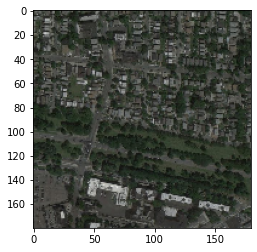

AUTO-ENCODER OUTPUT


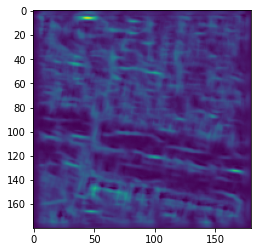

In [132]:
print("NORMAL")
plt.imshow(Resize_IMG)
plt.show()
print("AUTO-ENCODER OUTPUT")
plt.imshow(Prediction_IMG_Another)

NORMAL


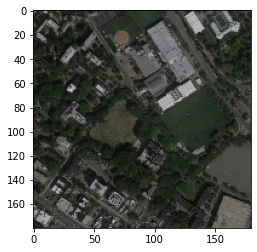

AUTO-ENCODER OUTPUT


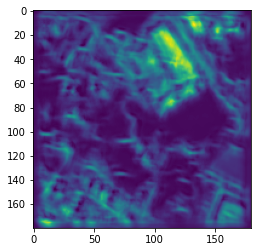

In [126]:
backend.set_image_data_format('channels_last')

Non_S_IMG = cv2.cvtColor(cv2.imread("../input/satellitegooglemapsmasks/content/drive/MyDrive/Google maps/train/images/1022.jpg"),
                        cv2.COLOR_BGR2RGB)

Resize_IMG = cv2.resize(Non_S_IMG,(180,180))
Resize_IMG = Resize_IMG/255.

Resize_IMG_Prediction = Resize_IMG.reshape(-1,Resize_IMG.shape[0],Resize_IMG.shape[1],Resize_IMG.shape[2])

Prediction_IMG_Another = Auto_Encoder.predict(Resize_IMG_Prediction)

Prediction_IMG_Another = Prediction_IMG_Another.reshape(Prediction_IMG_Another.shape[1],
                                                        Prediction_IMG_Another.shape[2],
                                                        Prediction_IMG_Another.shape[3])


print("NORMAL")
plt.imshow(Resize_IMG)
plt.show()
print("AUTO-ENCODER OUTPUT")
plt.imshow(Prediction_IMG_Another)

NORMAL


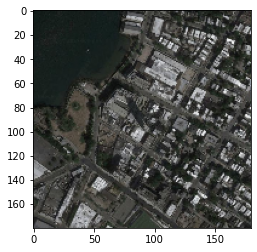

AUTO-ENCODER OUTPUT


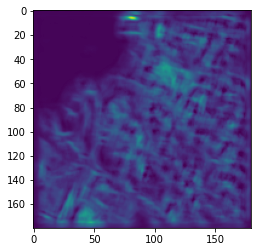

In [127]:
backend.set_image_data_format('channels_last')

Non_S_IMG = cv2.cvtColor(cv2.imread("../input/satellitegooglemapsmasks/content/drive/MyDrive/Google maps/train/images/1024.jpg"),
                        cv2.COLOR_BGR2RGB)

Resize_IMG = cv2.resize(Non_S_IMG,(180,180))
Resize_IMG = Resize_IMG/255.

Resize_IMG_Prediction = Resize_IMG.reshape(-1,Resize_IMG.shape[0],Resize_IMG.shape[1],Resize_IMG.shape[2])

Prediction_IMG_Another = Auto_Encoder.predict(Resize_IMG_Prediction)

Prediction_IMG_Another = Prediction_IMG_Another.reshape(Prediction_IMG_Another.shape[1],
                                                        Prediction_IMG_Another.shape[2],
                                                        Prediction_IMG_Another.shape[3])


print("NORMAL")
plt.imshow(Resize_IMG)
plt.show()
print("AUTO-ENCODER OUTPUT")
plt.imshow(Prediction_IMG_Another)

#### CHECKING

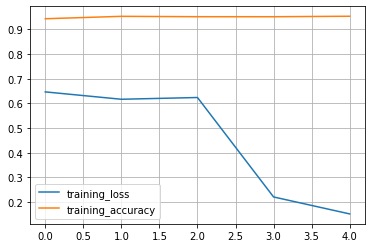

In [83]:
plt.plot(Auto_Encoder_Model.history['loss'], label = 'training_loss')
plt.plot(Auto_Encoder_Model.history['accuracy'], label = 'training_accuracy')
plt.legend()
plt.grid(True)

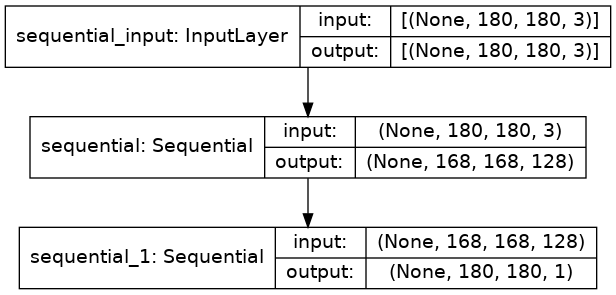

In [84]:
plot_model(Auto_Encoder, to_file='AEModel.png', show_shapes=True, show_layer_names=True)